# Setup

Run the following cell before any other to provide the necessary variables, classes and imports

In [4]:
import hpq
import datetime
import ijson

# 2022-12-30 14:55:00+00:00
start = datetime.datetime.fromtimestamp(1672412100, datetime.timezone.utc)
# 2022-12-30 15:00:00+00:00
end = datetime.datetime.fromtimestamp(1672412400, datetime.timezone.utc)
connection = hpq.create_web_socket_client()
request = {
    "query": "ticks",
    "source": "",
    "messages": ["TRD"],
    "product": "XOM",
    "time_zone": "UTC",
    "start_date": start.strftime("%Y-%m-%d"),
    "end_date": end.strftime("%Y-%m-%d"),
    "start_time": start.strftime("%H:%M:%S"),
    "end_time": end.strftime("%H:%M:%S"),
}


class Results:
    def __init__(self):
        self.prices = []
        self.quantities = []
        self.timestamps = []


def tabulate(req):
    results = Results()
    for trade in ijson.items(connection.stream(request), "item"):
        results.prices.append(trade["price"])
        results.quantities.append(trade["quantity"])
        time = datetime.datetime.fromtimestamp(
            trade["receipt_timestamp"] / 1000000000, datetime.timezone.utc
        )
        results.timestamps.append(time)
    return results


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Trade Prices for Individual Participants

Generates a graph of trade prices for XOM.

Note that the square bracket syntax requests ticks from only certain sip participants

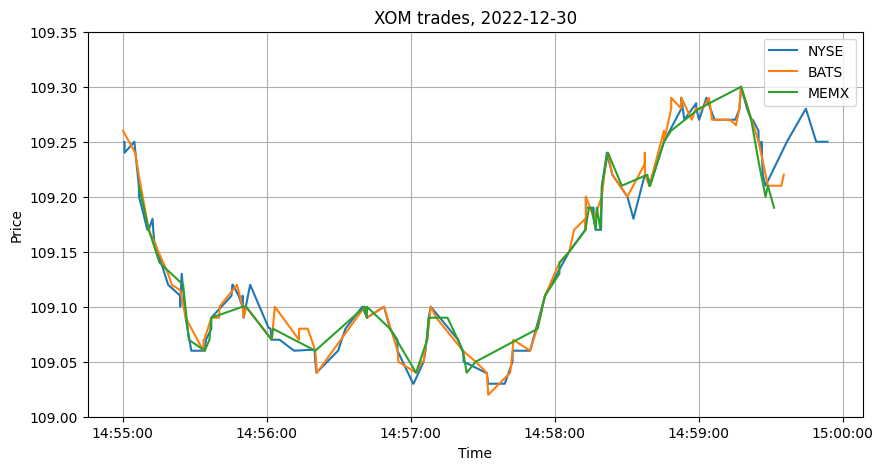

In [2]:
plt.rcParams["figure.figsize"] = [10, 5]

fig, ax = plt.subplots()

fig.patch.set_facecolor((1, 1, 1))

ax.grid(True)

ax.set_title("XOM trades, 2022-12-30")
ax.set_ylabel("Price")
ax.set_xlabel("Time")

ax.set_ylim(109.00, 109.35)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))

# get ticks data from the nyse venue
request["source"] = "sip[nyse]"
nyse_results = tabulate(request)
plt.plot(nyse_results.timestamps, nyse_results.prices, label="NYSE")
# get ticks data from the bats venue
request["source"] = "sip[bats]"
bats_results = tabulate(request)
plt.plot(bats_results.timestamps, bats_results.prices, label="BATS")
# get ticks data from the memx venue
request["source"] = "sip[memx]"
memx_results = tabulate(request)
plt.plot(memx_results.timestamps, memx_results.prices, label="MEMX")
plt.legend()
plt.show()

# Trade Prices for Individual Participants

Generates a graph of trade prices for XOM.

Note that the square bracket syntax requests ticks from a combination of sip participants

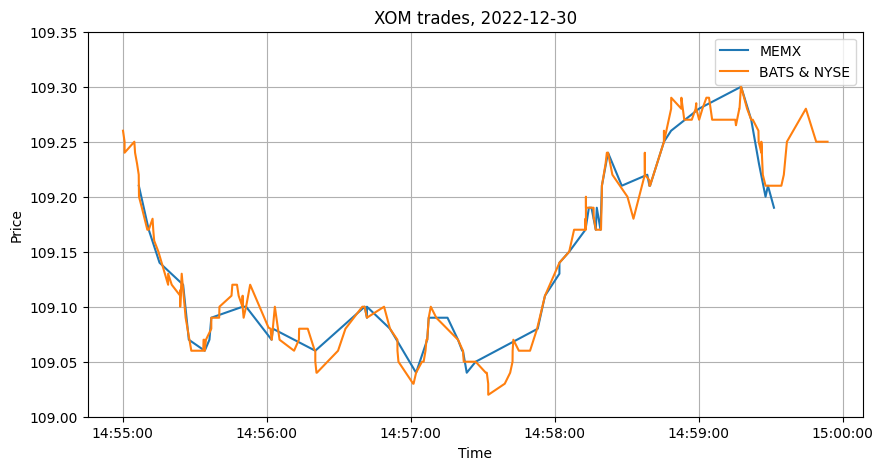

In [5]:
fig, ax = plt.subplots()

fig.patch.set_facecolor((1, 1, 1))

ax.grid(True)

ax.set_title("XOM trades, 2022-12-30")
ax.set_ylabel("Price")
ax.set_xlabel("Time")

ax.set_ylim(109.00, 109.35)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))

# get ticks data from the memx venue
request["source"] = "sip[memx]"
memx_results = tabulate(request)
plt.plot(memx_results.timestamps, memx_results.prices, label="MEMX")

# get ticks data from the bats and nyse venues
request["source"] = "sip[nyse,bats]"
bats_nyse_results = tabulate(request)
plt.plot(bats_nyse_results.timestamps, bats_nyse_results.prices, label="BATS & NYSE")
plt.legend()
plt.show()

# Trade Prices for Individual Participants

Generates a graph of trade prices for XOM.

Note that the square bracket syntax requests ticks from all the sip participants

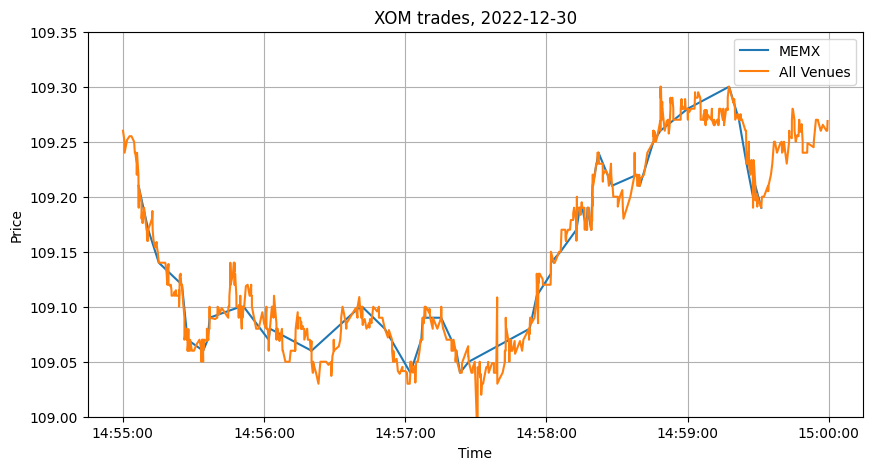

In [3]:
fig, ax = plt.subplots()

fig.patch.set_facecolor((1, 1, 1))

ax.grid(True)

ax.set_title("XOM trades, 2022-12-30")
ax.set_ylabel("Price")
ax.set_xlabel("Time")

ax.set_ylim(109.00, 109.35)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))

# get ticks data from the memx venue
request["source"] = "sip[memx]"
memx_results = tabulate(request)
plt.plot(memx_results.timestamps, memx_results.prices, label="MEMX")

# get ticks data from all the sip venues
request["source"] = "sip"
bats_nyse_results = tabulate(request)
plt.plot(bats_nyse_results.timestamps, bats_nyse_results.prices, label="All Venues")
plt.legend()
plt.show()